In [1]:
import numpy as np
import keras
import os
import sys
import json

import sys
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path

from utils.image_util import image_loader, resize_image, image_rotate, random_gamma, Adaptive_Histogram_Equalization, random_flip_image, normalize_img, crop_optic_disk
from utils.util import print_progress, last_cheackpoint
from config import *

Using TensorFlow backend.


In [2]:
with open(os.path.join(SEGMENT_RESULT_PATH,'model.json'), 'r') as f:
    model_json = json.loads(f.read())

In [3]:
model = keras.models.model_from_json(model_json)
weight = last_cheackpoint(SEGMENT_RESULT_PATH) # os.path.join(SEGMENT_RESULT_PATH,"checkpoint-022.h5")
print(os.path.basename(weight))
model.load_weights(weight)

Instructions for updating:
Colocations handled automatically by placer.
checkpoint-058.h5


In [4]:
image_files = []
for (path, dir, files) in os.walk(TEST_IMAGE):
    if path ==TEST_IMAGE: # 현재 디렉토리는 넘김
        continue
    for file in files:
        image_files.append(os.path.join(path, file))

In [5]:
total_length = len(image_files)
sample_length = total_length

In [6]:
data = np.zeros((sample_length,) +IMAGE_SHAPE)
for i, file in enumerate(image_files[:sample_length]):
    print_progress(total_length,i+1)
    image = image_loader(file)
    image = resize_image(image,IMAGE_SHAPE)
    data[i] = image

  [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400 Done


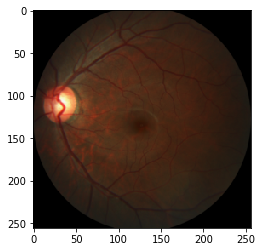

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0])

In [8]:
y_pred = model.predict(data, verbose=1,batch_size=1)
y_pred = np.argmax(y_pred,-1)
y_pred.shape

400/400 [==============================] - 17s 42ms/step


(400, 256, 256)

In [9]:
temp = np.zeros((sample_length,)+IMAGE_SHAPE)

In [10]:
y_pred = np.where(y_pred>=0.3,255,y_pred)
y_pred = np.where(y_pred<0.3,0,y_pred)

In [11]:
for i in range(3):
    temp[:,:,:,i] = y_pred

In [12]:
idx = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Projects\my_Glaucoma_project_v2\dataset\Glaucoma\Test\Glaucoma\g0001.jpg


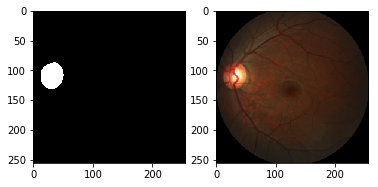

In [13]:
f = plt.figure()
print(image_files[idx])
f.add_subplot(1,2, 1)
plt.imshow(temp[idx])
f.add_subplot(1,2, 2)
plt.imshow(data[idx])

plt.show(block=True)
idx += 1

## image open close

In [18]:
from skimage.morphology import opening, closing
from skimage.morphology import square
from skimage.morphology import disk

In [19]:
def opening_image(img,size):
    zero = np.zeros(img.shape)
    for i in range(img.shape[-1]):
        zero[:,:,i] = opening(img[:,:,i],disk(size))
    return zero

def closing_image(img,size):
    zero = np.zeros(img.shape)
    for i in range(img.shape[-1]):
        zero[:,:,i] = closing(img[:,:,i],disk(size))
    return zero

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


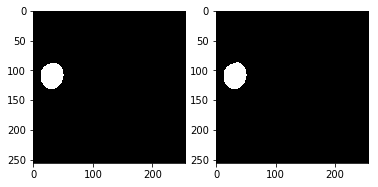

In [21]:
idx = 0
opensize = 10
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(opening_image(temp[idx],opensize))
f.add_subplot(1,2, 2)
plt.imshow(temp[idx])
plt.show(block=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


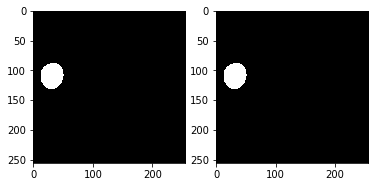

In [26]:
# idx =81
f = plt.figure()
f.add_subplot(1,2, 1)

opend = opening_image(temp[idx],opensize)
plt.imshow(opend)
f.add_subplot(1,2, 2)
closed = closing_image(opend,opensize)
plt.imshow(closed)
plt.show(block=True)

In [29]:
closed.

(256, 256, 3)